In [2]:
!pip install jovian opendatasets --upgrade --quiet

In [3]:
dataset_url = 'https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data/code?select=Sale+Report.csv'

In [4]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./unlock-profits-with-e-commerce-sales-data" (use force=True to force download)


In [5]:
data_dir = './unlock-profits-with-e-commerce-sales-data'

In [6]:
import os
os.listdir(data_dir)

['Amazon Sale Report.csv',
 'Expense IIGF.csv',
 'International sale Report.csv',
 'May-2022.csv',
 'Sale Report.csv',
 'P  L March 2021.csv',
 'Cloud Warehouse Compersion Chart.csv']

In [7]:
project_name = "exploratory-data-analysis-of-e-commerce-sales-data"

In [8]:
!pip install jovian --upgrade -q

In [9]:
import jovian


In [10]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [11]:
#loading the dataset into the dataframe using pandas
#loading numpy library to make numeric calculations with
import pandas as pd
import numpy as np
amazon_sales = pd.read_csv(data_dir + "/Amazon Sale Report.csv" )

<ipython-input-11-cb0fb6baad0d>:5: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  amazon_sales = pd.read_csv(data_dir + "/Amazon Sale Report.csv" )


In [12]:
International_sale = pd.read_csv(data_dir + "/International sale Report.csv" )
International_sale.columns

Index(['index', 'DATE', 'Months', 'CUSTOMER', 'Style', 'SKU', 'Size', 'PCS',
       'RATE', 'GROSS AMT'],
      dtype='object')

In [13]:
sale_report = pd.read_csv(data_dir + "/Sale Report.csv" )
sale_report.columns

Index(['index', 'SKU Code', 'Design No.', 'Stock', 'Category', 'Size',
       'Color'],
      dtype='object')

In [14]:
amazon_sales

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [15]:
amazon_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [16]:
amazon_sales.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [17]:
#Handling the missing values
# Drop rows with any missing values
amazon_sales_df = amazon_sales.dropna()

# Checking the number of rows and columns in the cleaned dataset
print("Original dataset shape:", amazon_sales.shape)
print("Cleaned dataset shape:", amazon_sales_df.shape)

Original dataset shape: (128975, 24)
Cleaned dataset shape: (19379, 24)


In [18]:
amazon_sales_df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
49051,49051,408-4858463-2356347,05-31-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0385,J0385-KR-M,kurta,...,INR,888.0,RAJAHMUNDRY,ANDHRA PRADESH,533126.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
49077,49077,402-7697834-2682766,05-31-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3654,JNE3654-TP-XXL,Top,...,INR,371.0,CHENNAI,TAMIL NADU,600042.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
49081,49081,402-7031777-0396341,05-31-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3798,JNE3798-KR-XS,Western Dress,...,INR,771.0,NEDUMANGAD,KERALA,695541.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
49082,49082,408-1235521-4337163,05-31-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0152,J0152-DR-L,Western Dress,...,INR,0.0,LEH,JAMMU & KASHMIR,194101.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
49083,49083,403-3845187-4421165,05-31-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0157,J0157-DR-XL,Western Dress,...,INR,690.0,PIMPRI CHINCHWAD,MAHARASHTRA,411027.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128872,128872,405-4724097-1016369,06-01-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0243,J0243-DR-S,Ethnic Dress,...,INR,999.0,ALLUR,ANDHRA PRADESH,524315.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
128873,128873,405-4724097-1016369,06-01-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0079,J0079-SKD-S,Set,...,INR,1523.0,ALLUR,ANDHRA PRADESH,524315.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
128874,128874,405-4724097-1016369,06-01-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0009,J0009-SKD-S,Set,...,INR,854.0,ALLUR,ANDHRA PRADESH,524315.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
128887,128887,405-6493630-8542756,05-31-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0301,J0301-TP-M,Top,...,INR,518.0,NOIDA,UTTAR PRADESH,201301.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False


In [19]:
#parsing date
# Create a new copy of the DataFrame to avoid modifying the original DataFrame
amazon_sales_df_copy = amazon_sales_df.copy()

# Convert the 'Date' column to datetime data type using .loc
amazon_sales_df_copy.loc[:, 'Date'] = pd.to_datetime(amazon_sales_df_copy['Date'], errors='coerce')

# Create new columns for year, month, and day using .loc to avoid the warning
amazon_sales_df_copy.loc[:, 'Year'] = amazon_sales_df_copy['Date'].dt.year
amazon_sales_df_copy.loc[:, 'Month'] = amazon_sales_df_copy['Date'].dt.month
amazon_sales_df_copy.loc[:, 'Day'] = amazon_sales_df_copy['Date'].dt.day

# Checking the updated DataFrame
amazon_sales_df_copy.head()


<ipython-input-19-3ea34604aa0d>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  amazon_sales_df_copy.loc[:, 'Date'] = pd.to_datetime(amazon_sales_df_copy['Date'], errors='coerce')


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22,Year,Month,Day
49051,49051,408-4858463-2356347,2022-05-31,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0385,J0385-KR-M,kurta,...,ANDHRA PRADESH,533126.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False,2022,5,31
49077,49077,402-7697834-2682766,2022-05-31,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3654,JNE3654-TP-XXL,Top,...,TAMIL NADU,600042.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False,2022,5,31
49081,49081,402-7031777-0396341,2022-05-31,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3798,JNE3798-KR-XS,Western Dress,...,KERALA,695541.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False,2022,5,31
49082,49082,408-1235521-4337163,2022-05-31,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0152,J0152-DR-L,Western Dress,...,JAMMU & KASHMIR,194101.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False,2022,5,31
49083,49083,403-3845187-4421165,2022-05-31,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0157,J0157-DR-XL,Western Dress,...,MAHARASHTRA,411027.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False,2022,5,31


In [20]:
import jovian

In [21]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [22]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [23]:
print(amazon_sales_df_copy['Month'].unique())

[5 4 6]


In [24]:
#checking whether the 4th month have values
month_4_data = amazon_sales_df_copy[amazon_sales_df_copy['Month'] == 4]
month_4_data

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22,Year,Month,Day
91000,91000,402-6157470-5237103,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,MEN5032,MEN5032-KR-S,kurta,...,Gujarat,390018.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False,2022,4,30
91006,91006,408-2745386-8094720,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,SET345,SET345-KR-NP-XXL,Set,...,KARNATAKA,560095.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False,2022,4,30
91014,91014,406-5606057-7212344,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3160,JNE3160-KR-G-M,kurta,...,MAHARASHTRA,441912.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False,2022,4,30
91018,91018,405-1019015-0931523,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3468,JNE3468-KR-XXL,kurta,...,MAHARASHTRA,400050.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False,2022,4,30
91028,91028,402-6150244-1432307,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3671,JNE3671-TU-M,Top,...,MAHARASHTRA,411051.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False,2022,4,30
91030,91030,405-8039207-7351556,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0308,J0308-DR-S,Western Dress,...,TAMIL NADU,641028.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False,2022,4,30
91033,91033,408-9839921-6777950,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0010,J0010-LCD-XL,Set,...,MAHARASHTRA,401107.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False,2022,4,30
91039,91039,402-2365203-8776358,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE2153,JNE2153-KR-278-A-M,kurta,...,DELHI,110014.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False,2022,4,30
91041,91041,406-6104191-9719540,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3675,JNE3675-TU-L,Top,...,HARYANA,122018.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False,2022,4,30
91050,91050,402-8922733-9356365,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,SET319,SET319-KR-NP-L,Set,...,MAHARASHTRA,411036.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False,2022,4,30


In [25]:
month_4_data = amazon_sales_df_copy[amazon_sales_df_copy['Month'] == 4]
print(month_4_data['Amount'].dropna())

91000     579.0
91006       0.0
91014     685.0
91018     363.0
91028     574.0
91030     665.0
91033     999.0
91039     424.0
91041     545.0
91050     888.0
91052     399.0
91062     699.0
91075     363.0
91084     939.0
91087    1523.0
91089     759.0
91092     459.0
91095     791.0
91106     342.0
91112     549.0
91127     342.0
91128     329.0
91129     318.0
91130     259.0
91133     419.0
91162     363.0
91164     568.0
91180     363.0
91181     318.0
91185     791.0
Name: Amount, dtype: float64


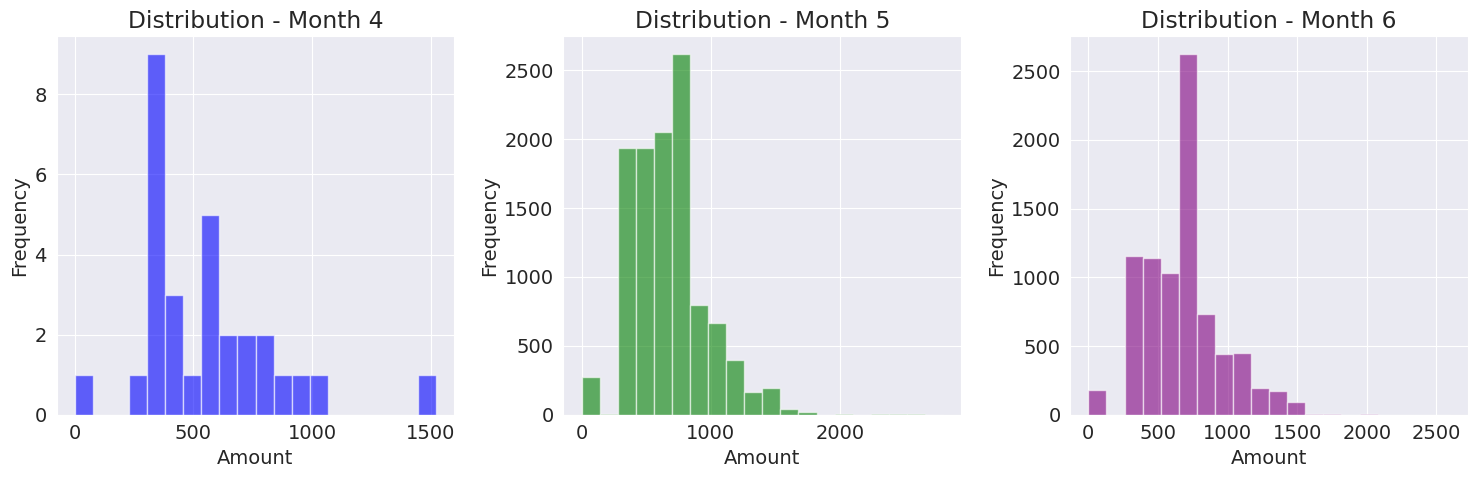

In [26]:
import matplotlib.pyplot as plt

# Filter the data for each month (4, 5, and 6)
month_4_data = amazon_sales_df_copy[amazon_sales_df_copy['Month'] == 4]['Amount'].dropna()
month_5_data = amazon_sales_df_copy[amazon_sales_df_copy['Month'] == 5]['Amount'].dropna()
month_6_data = amazon_sales_df_copy[amazon_sales_df_copy['Month'] == 6]['Amount'].dropna()

# Create a figure with subplots
plt.figure(figsize=(15, 5))

# Plot histogram for Month 4
plt.subplot(1, 3, 1)
plt.hist(month_4_data, bins=20, alpha=0.6, color='blue')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution - Month 4')

# Plot histogram for Month 5
plt.subplot(1, 3, 2)
plt.hist(month_5_data, bins=20, alpha=0.6, color='green')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution - Month 5')

# Plot histogram for Month 6
plt.subplot(1, 3, 3)
plt.hist(month_6_data, bins=20, alpha=0.6, color='purple')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution - Month 6')

plt.tight_layout()
plt.show()

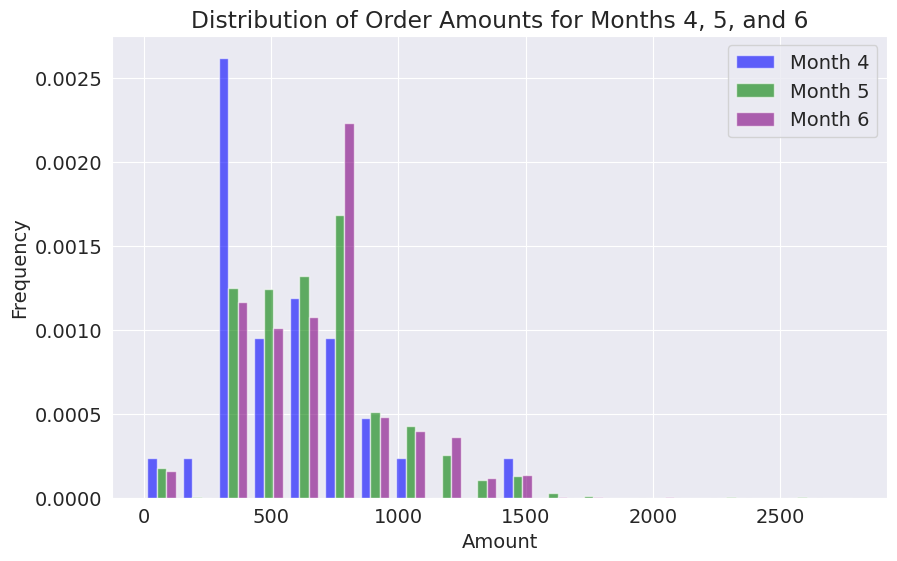

In [27]:
# Filtering the data for months 4, 5, and 6
month_4_data = amazon_sales_df_copy[amazon_sales_df_copy['Month'] == 4]['Amount'].dropna()
month_5_data = amazon_sales_df_copy[amazon_sales_df_copy['Month'] == 5]['Amount'].dropna()
month_6_data = amazon_sales_df_copy[amazon_sales_df_copy['Month'] == 6]['Amount'].dropna()

# Combining data from all three months
combined_data = [month_4_data, month_5_data, month_6_data]

# Creating a single histogram for all three months
plt.figure(figsize=(10, 6))
plt.hist(combined_data, bins=20, alpha=0.6, color=['blue', 'green', 'purple'], label=['Month 4', 'Month 5', 'Month 6'], density=True)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Order Amounts for Months 4, 5, and 6')
plt.legend()
plt.show()

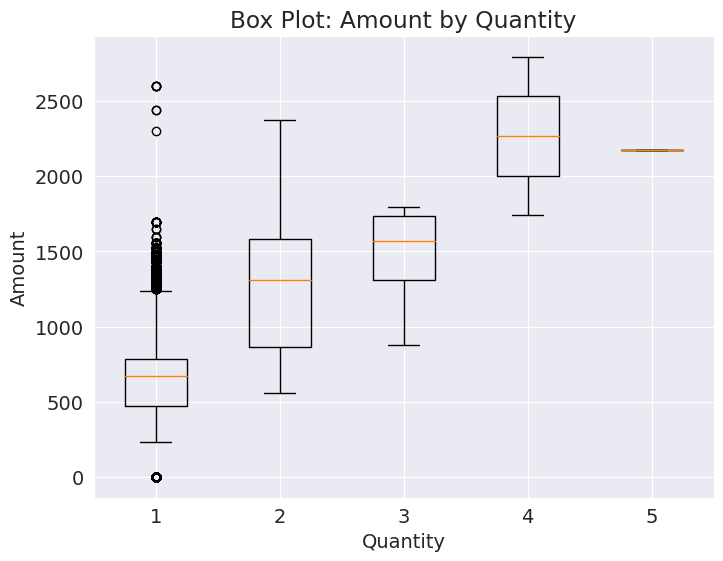

In [28]:
# Creating a box plot to show the distribution of 'Amount' for each 'Qty' value
plt.figure(figsize=(8, 6))
plt.boxplot([amazon_sales_df_copy[amazon_sales_df_copy['Qty'] == qty]['Amount'] for qty in amazon_sales_df_copy['Qty'].unique()],
            labels=amazon_sales_df_copy['Qty'].unique())
plt.xlabel('Quantity')
plt.ylabel('Amount')
plt.title('Box Plot: Amount by Quantity')
plt.show()

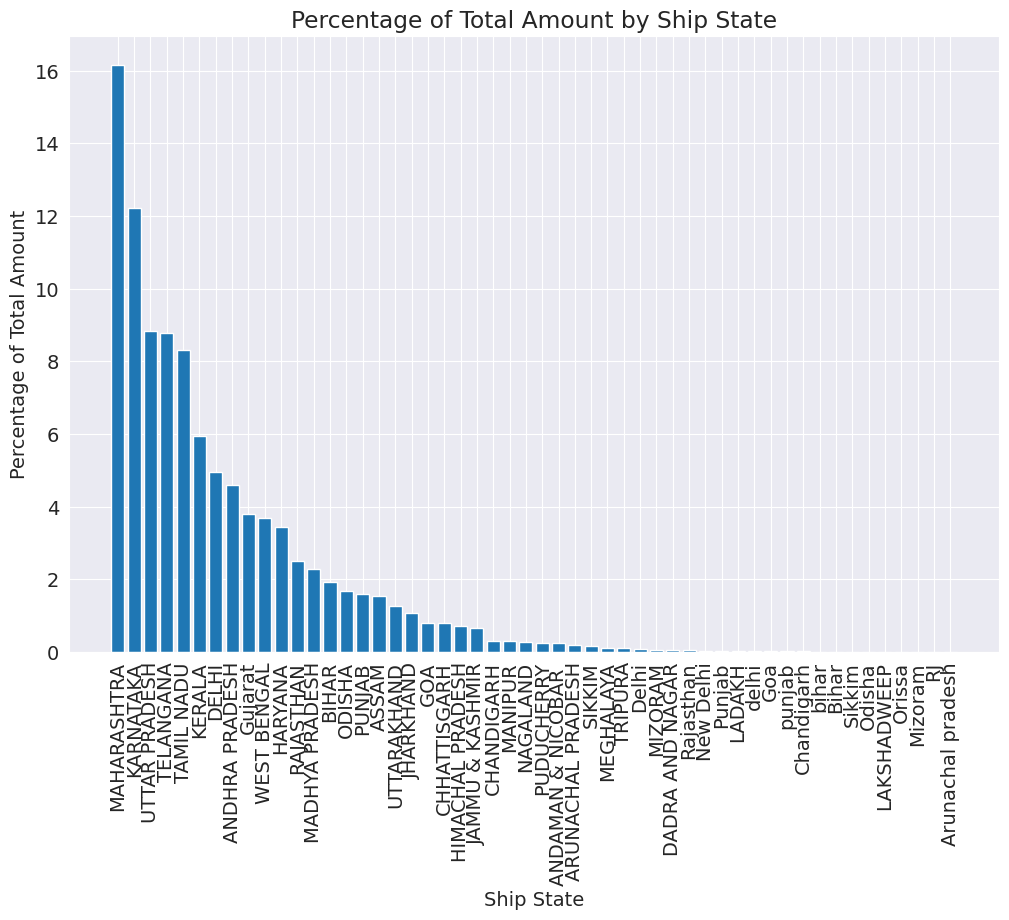

In [29]:
# Calculating the sum of 'Amount' for each 'ship-state'
amount_by_state = amazon_sales_df_copy.groupby('ship-state')['Amount'].sum()

# Sorting the states based on the total amount in descending order
amount_by_state = amount_by_state.sort_values(ascending=False)

# Calculating the total amount
total_amount = amount_by_state.sum()

# Calculating the percentage of each state's total amount
percentage_by_state = (amount_by_state / total_amount) * 100

# Creating a bar plot
plt.figure(figsize=(12, 8))
plt.bar(percentage_by_state.index, percentage_by_state.values)
plt.xticks(rotation=90)
plt.xlabel('Ship State')
plt.ylabel('Percentage of Total Amount')
plt.title('Percentage of Total Amount by Ship State')
plt.show()

In [37]:
!pip install squarify
import squarify

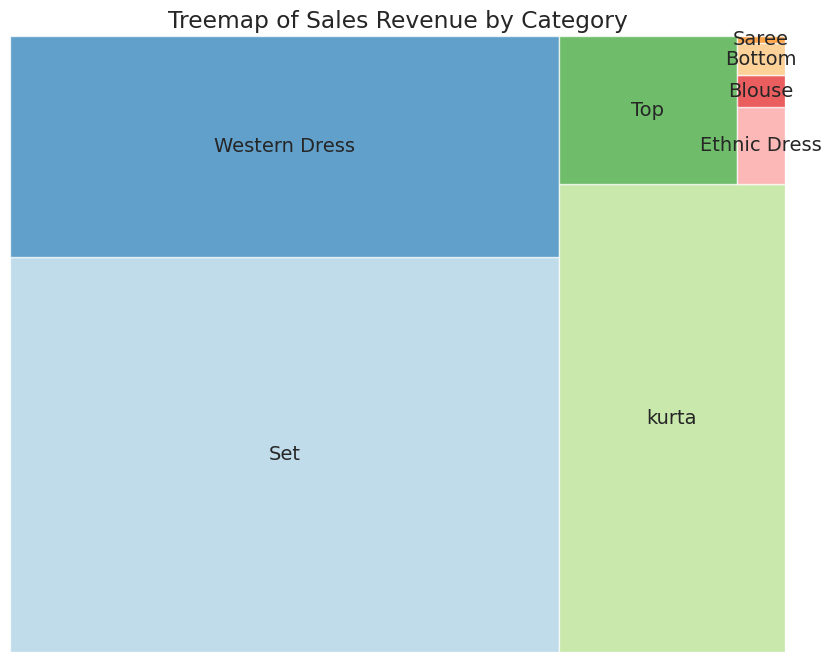

In [38]:
# Calculating the sum of 'Amount' for each 'Category'
amount_by_category = amazon_sales_df_copy.groupby('Category')['Amount'].sum()

# Sorting the data by amount in descending order
amount_by_category = amount_by_category.sort_values(ascending=False)

# Creating a treemap
plt.figure(figsize=(10, 8))

# Plotting the treemap
squarify.plot(sizes=amount_by_category.values, label=amount_by_category.index, alpha=0.7, color=plt.cm.Paired.colors)

plt.axis('off')
plt.title('Treemap of Sales Revenue by Category')
plt.show()

In [39]:
import jovian

In [40]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [41]:
""" Q1: Which product category generated the highest sales revenue, and what is the total revenue for that category? """
# Calculateing the total sales revenue for each product category
total_revenue_by_category = amazon_sales_df_copy.groupby('Category')['Amount'].sum()

# Lets find the product category with the highest sales revenue
highest_revenue_category = total_revenue_by_category.idxmax()
highest_revenue = total_revenue_by_category.max()

print(f"The product category with the highest sales revenue is '{highest_revenue_category}' with a total revenue of ${highest_revenue:.2f}.")

The product category with the highest sales revenue is 'Set' with a total revenue of $5919897.00.


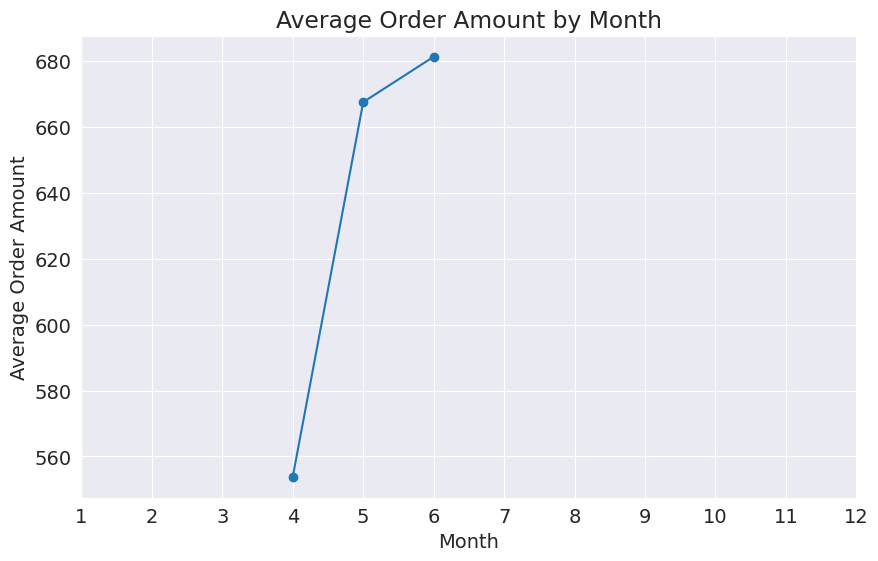

In [42]:
""" Q2: How does the average order amount vary across different months of the year? """
# Calculating the average order amount for each month
average_amount_by_month = amazon_sales_df_copy.groupby('Month')['Amount'].mean()

# lets create a line plot
plt.figure(figsize=(10, 6))
plt.plot(average_amount_by_month.index, average_amount_by_month.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Average Order Amount')
plt.title('Average Order Amount by Month')
plt.xticks(range(1, 13))  # Set the x-axis ticks to show all months from 1 to 12
plt.grid(True)
plt.show()

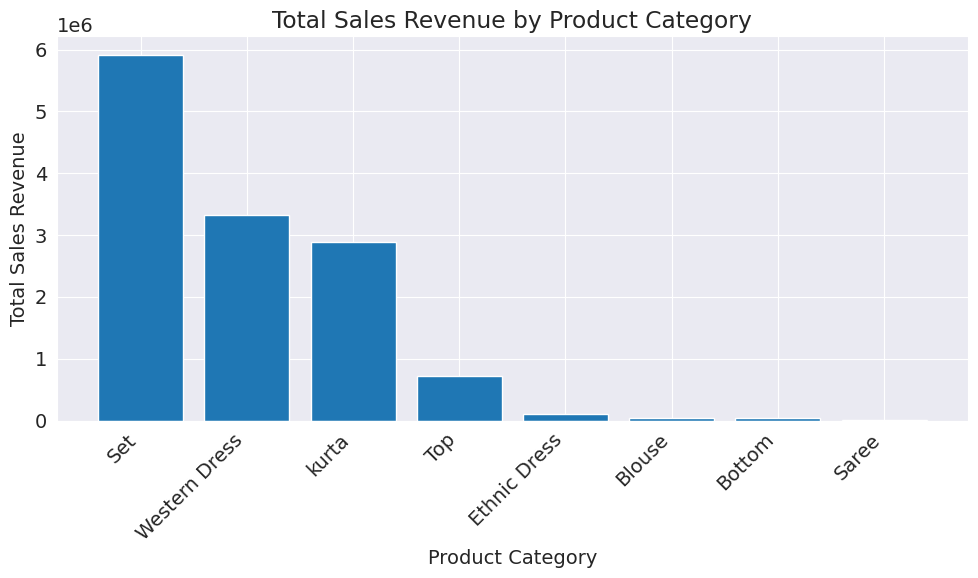

In [43]:
""" Q3: How does the total sales revenue vary across different product categories? """
# Grouping the data by product category and calculate the total sales revenue for each category
revenue_by_category = amazon_sales_df_copy.groupby('Category')['Amount'].sum()

# Sorting the data by total sales revenue in descending order
revenue_by_category = revenue_by_category.sort_values(ascending=False)

# Creating a bar plot to visualize the distribution
plt.figure(figsize=(10, 6))
plt.bar(revenue_by_category.index, revenue_by_category.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Revenue')
plt.title('Total Sales Revenue by Product Category')
plt.tight_layout()
plt.show()

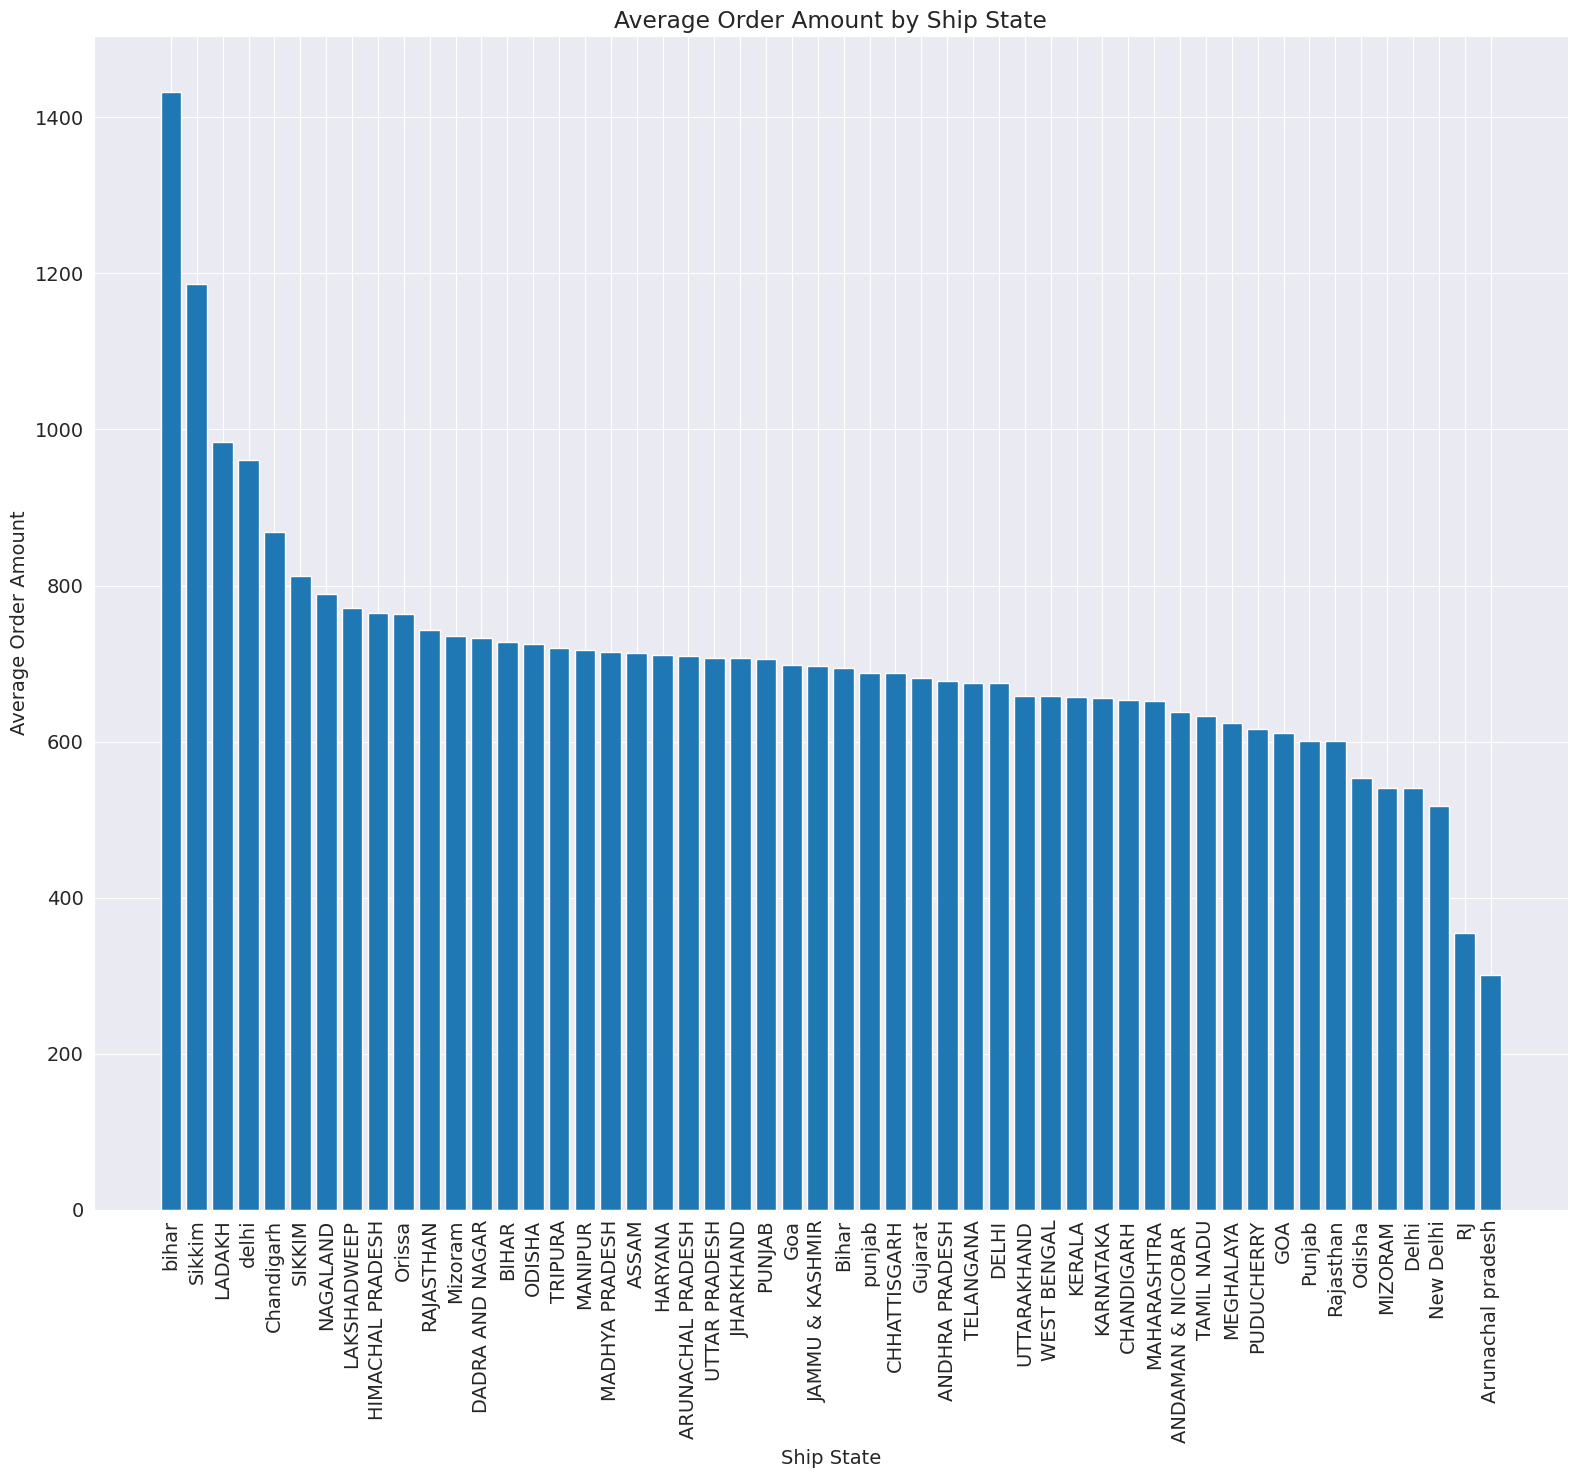

In [44]:
""" #### Q4: How does the average order amount vary for different ship states? """
# Grouping the data by ship state and calculate the average order amount for each state
average_amount_by_state = amazon_sales_df_copy.groupby('ship-state')['Amount'].mean()

# Sorting the data by average order amount in descending order
average_amount_by_state = average_amount_by_state.sort_values(ascending=False)

# Creating a bar plot to visualize the distribution
plt.figure(figsize=(16, 15))
plt.bar(average_amount_by_state.index, average_amount_by_state.values)
plt.xticks(rotation=90)
plt.xlabel('Ship State')
plt.ylabel('Average Order Amount')
plt.title('Average Order Amount by Ship State')
plt.tight_layout()
plt.show()


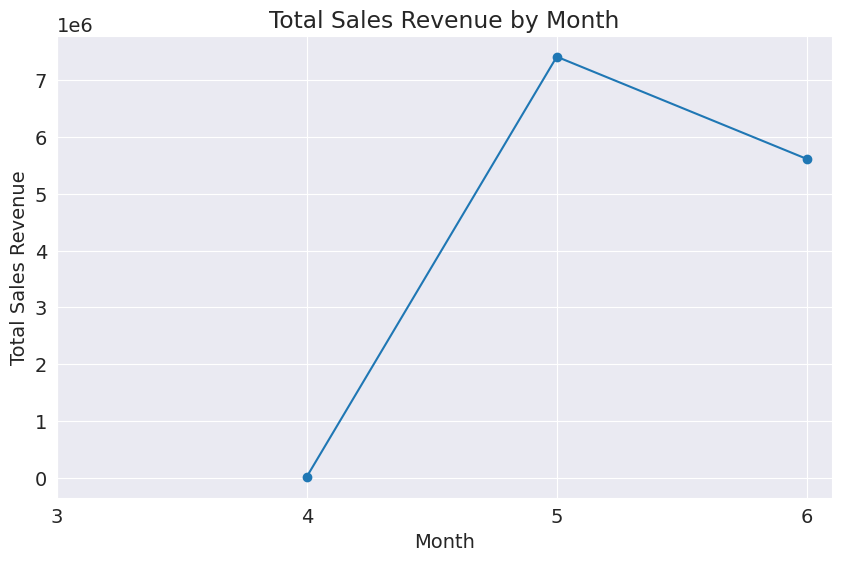

In [45]:
""" Q5: Are there any seasonal trends in sales revenue? (E.g., do sales increase during certain months of the year?) the datase contains 3 months of data. """
# Converting the 'Date' column to datetime format if it's not already in datetime format
amazon_sales_df_copy['Date'] = pd.to_datetime(amazon_sales_df_copy['Date'])

# Extracting the month from the 'Date' column and store it in a new column 'Order Month'
amazon_sales_df_copy['Order Month'] = amazon_sales_df_copy['Date'].dt.month

# Grouping the data by the 'Order Month' column and calculate the total sales revenue for each month
revenue_by_month = amazon_sales_df_copy.groupby('Order Month')['Amount'].sum()

# Create a new DataFrame with all months from 3 to 6 and their corresponding sales revenue
all_months = pd.Series(range(3, 7), name='Month')
all_revenue = pd.merge(all_months, revenue_by_month, left_on='Month', right_index=True, how='left')

# Creating a line plot to visualize the distribution
plt.figure(figsize=(10, 6))
plt.plot(all_revenue['Month'], all_revenue['Amount'], marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales Revenue')
plt.title('Total Sales Revenue by Month')
plt.xticks(range(3, 7), ['3', '4', '5', '6'])  # Set x-axis ticks to show months 3 to 6
plt.grid(True)
plt.show()

In [46]:
import jovian

In [47]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.
